# Preamble

In [ ]:
# Preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_codes'


import numpy as np
import torch
import matplotlib.pyplot as plt
import random

from google.colab import drive

import shutil
import pickle
import os

import time

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


!pip install import-ipynb
import import_ipynb


from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)



if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight

if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/'  )    

import my_signal_processing


base_directory_data_str =  base_directory_str + '/data/figure4_data/'
base_directory_figure_str =  base_directory_str + '/figures/figure4/'

if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")


print(device)
plt.rcParams["mathtext.default"]= 'regular'

plt_fontsize_label_ = 30
plt_fontsize_legend_ = 27

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

                

Mounted at /content/gdrive
cpu


# $\beta$ change, no normalization

In [ ]:
device1 = device
dtype1 = torch.float32

N_epoch = 4000




N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100


lr = .001


def activation1(x):

  return (torch.mul( x >= 0 , x  )*1).to(dtype = dtype1)


def derivative_activation1(x):
  # return torch.ones_like(x) 
  return ((x >= 0) * 1).to(dtype = dtype1)
  



Repetition = 30
angle_W1_B_list_beta_list = []
angle_dw0_bp_dw0_fa_list_beta_list = []


beta_list = [0 , 0.2  , 0.4 , 0.6 , 0.8 , 1]



for beta in beta_list:

  print(beta)

  for rep in range(Repetition):


    W0 = (torch.randn([N_input , N_hidden], dtype = dtype1   )).to(device1)
    W1 = (torch.randn([N_hidden , N_output] , dtype = dtype1  )).to(device1)
    B = (torch.randn([N_output , N_hidden] , dtype = dtype1  )).to(device1) 

    X = (torch.randn([N_batch , N_input]  , dtype = dtype1  )).to(device1)
    E = torch.randn( [N_batch , N_output] , dtype = dtype1  ).to(device1)

    

   

    angle_W1_B_list = []
    angle_dW1_B_list = []






    angle_dw0_bp_dw0_fa_list = []




    for i in range(N_epoch):
      
      

      E = E*beta  + torch.randn( [N_batch , N_output] , dtype = dtype1 ).to(device1)*(1-beta)



      Z1 = torch.matmul(   X ,  W0  )
      L1 = activation1( Z1 )
      Z2 = torch.matmul(   L1 ,  W1  )
      L2 = activation1(  Z2   )

      delta2 =  E 
      delta2 = torch.mul( delta2 , derivative_activation1( Z2 )  ) 
      


      dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



      delta1 = torch.matmul (  delta2  ,  B  )
      delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )


      dw0 = lr* torch.matmul (     X.t()   ,    delta1  )


      
      W1 = W1 + dw1
      W0 = W0 + dw0




      delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
      delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )

      dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )



      angle_dw0_bp_dw0_fa_list.append(   my_weight.angle(  dw0_bp  ,  dw0   )   )

      angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )





    angle_dw0_bp_dw0_fa_list_beta_list . append(  angle_dw0_bp_dw0_fa_list )
    angle_W1_B_list_beta_list . append( angle_W1_B_list )




with open( base_directory_data_str + "No_Normalization_angle_W_B_data.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_W1_B_list_beta_list  , fp)


with open(  base_directory_data_str + "No_Normalization_angle_dw_bp_fa_data.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_dw0_bp_dw0_fa_list_beta_list  , fp)






0
0.2
0.4
0.6
0.8
1


# $\beta$ change, with weight normalization

In [ ]:
device1 = device
dtype1 = torch.float32

N_epoch = 4000

N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100


lr = .001


def activation1(x):

  return (torch.mul( x >= 0 , x  )*1).to(dtype = dtype1)


def derivative_activation1(x):

  return ((x >= 0) * 1).to(dtype = dtype1)



Repetition = 30
angle_W1_B_list_beta_list = []
angle_dw0_bp_dw0_fa_list_beta_list = []

beta_list = [0 , 0.2  , 0.4 , 0.6 , 0.8 , 1]

betaY = 1

for beta in beta_list:

  print(beta)

  for rep in range(Repetition):


    W0 = (torch.randn([N_input , N_hidden], dtype = dtype1   )).to(device1)
    W1 = (torch.randn([N_hidden , N_output] , dtype = dtype1  )).to(device1)
    B = (torch.randn([N_output , N_hidden] , dtype = dtype1  )).to(device1)

    X = (torch.randn([N_batch , N_input]  , dtype = dtype1  )).to(device1)
    E = torch.randn( [N_batch , N_output] , dtype = dtype1  ).to(device1)

    

    initial_norm_W0 = 1
    initial_norm_W1 = 1



    W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
    W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1


    angle_W1_B_list = []
    angle_dW1_B_list = []






    angle_dw0_bp_dw0_fa_list = []




    for i in range(N_epoch):
      
      

      E = E*beta  + torch.randn( [N_batch , N_output] , dtype = dtype1 ).to(device1)*(1-beta)



      Z1 = torch.matmul(   X ,  W0  )
      L1 = activation1( Z1 )
      Z2 = torch.matmul(   L1 ,  W1  )
      L2 = activation1(  Z2   )

      delta2 =  E 
      delta2 = torch.mul( delta2 , derivative_activation1( Z2 )  ) 
      


      dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



      delta1 = torch.matmul (  delta2  ,  B  )
      delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )


      dw0 = lr* torch.matmul (     X.t()   ,    delta1  )


      
      W1 = W1 + dw1
      W0 = W0 + dw0
      


      W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
      W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1



      delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
      delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )

      dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )



      angle_dw0_bp_dw0_fa_list.append(   my_weight.angle(  dw0_bp  ,  dw0   )   )

      angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )





    angle_dw0_bp_dw0_fa_list_beta_list.append(  angle_dw0_bp_dw0_fa_list )
    angle_W1_B_list_beta_list.append( angle_W1_B_list )




with open( base_directory_data_str + "Weight_Normalization_angle_W_B.txt"  , "wb" ) as fp:   #Pickling
  pickle.dump( angle_W1_B_list_beta_list  , fp)


with open(  base_directory_data_str + "Weight_Normalization_angle_dw_bp_fa_data.txt"  , "wb"  ) as fp:   #Pickling
  pickle.dump( angle_dw0_bp_dw0_fa_list_beta_list  , fp)



0
0.2
0.4
0.6
0.8
1


# $\beta_X$ change, no normalization 

In [ ]:
#Normalization to 1 

device1 = device
dtype1 = torch.float32

N_epoch = 7000

N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100


lr = .002


def activation1(x):

  return (torch.mul( x >= 0 , x  )*1).to(dtype = dtype1)


def derivative_activation1(x):

  return ((x >= 0) * 1).to(dtype = dtype1)



Repetition = 30
angle_W1_B_list_beta_list = []
angle_dw0_bp_dw0_fa_list_beta_list = []


beta_list = [0 , 0.2  , 0.4 , 0.6 , 0.8 , 1]

beta = 0.8

for betaX in beta_list:
  print( betaX )
  for rep in range(Repetition):

    W0 = (torch.randn([N_input , N_hidden], dtype = dtype1   )).to(device1)
    W1 = (torch.randn([N_hidden , N_output] , dtype = dtype1  )).to(device1)
    B = (torch.randn([N_output , N_hidden] , dtype = dtype1  )).to(device1)

    X = (torch.randn([N_batch , N_input]  , dtype = dtype1  )).to(device1)
    E0 = torch.randn( [N_batch , N_output] , dtype = dtype1  ).to(device1)



    angle_W1_B_list = []
    angle_dW1_B_list = []







    angle_dw0_bp_dw0_fa_list = []





    E = E0.clone()

 



    for i in range(N_epoch):
      
      

      E = E*beta  + torch.randn( [N_batch , N_output] , dtype = dtype1 ).to(device1)*(1-beta)
   
      X = X*betaX  + torch.randn( [N_batch , N_input] , dtype = dtype1 ).to(device1)*(1-betaX)


      Z1 = torch.matmul(   X ,  W0  )
      L1 = activation1( Z1 )
      Z2 = torch.matmul(   L1 ,  W1  )
      L2 = activation1(  Z2   )

      delta2 =  E 
      delta2 = torch.mul( delta2 , derivative_activation1( Z2 )  ) 
      


      dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



      delta1 = torch.matmul (  delta2  ,  B  )
      delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )

      dw0 = lr* torch.matmul (     X.t()   ,    delta1  )

      
      W1 = W1 + dw1
      W0 = W0 + dw0
      


      delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
      delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )


      dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )



      angle_dw0_bp_dw0_fa_list.append(   my_weight.angle(  dw0_bp  ,  dw0   )   )

      angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )




    angle_dw0_bp_dw0_fa_list_beta_list.append(  angle_dw0_bp_dw0_fa_list )
    angle_W1_B_list_beta_list.append( angle_W1_B_list )







with open( base_directory_data_str + "No_Normalization_angle_W_B_betaX.txt"  , "wb" ) as fp:   #Pickling
  pickle.dump( angle_W1_B_list_beta_list  , fp)


with open(  base_directory_data_str + "No_Normalization_angle_dw_bp_fa_data_betaX.txt"  , "wb"  ) as fp:   #Pickling
  pickle.dump( angle_dw0_bp_dw0_fa_list_beta_list  , fp)




0
0.2
0.4
0.6
0.8
1


# $\beta_X$ change, with normalization 

In [ ]:
# Normalize to 1 

device1 = device
dtype1 = torch.float32

N_epoch = 7000

N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100


lr = .002


def activation1(x):
  
  return (torch.mul( x >= 0 , x  )*1).to(dtype = dtype1)


def derivative_activation1(x):

  return ((x >= 0) * 1).to(dtype = dtype1)
  


Repetition = 30
angle_W1_B_list_beta_list = []
angle_dw0_bp_dw0_fa_list_beta_list = []


beta_list = [0 , 0.2  , 0.4 , 0.6 , 0.8 , 1]

beta = 0.8

for betaX in beta_list:
  print( betaX )
  for rep in range(Repetition):

    W0 = (torch.randn([N_input , N_hidden], dtype = dtype1   )).to(device1)
    W1 = (torch.randn([N_hidden , N_output] , dtype = dtype1  )).to(device1)
    B = (torch.randn([N_output , N_hidden] , dtype = dtype1  )).to(device1)

    X = (torch.randn([N_batch , N_input]  , dtype = dtype1  )).to(device1)
    E0 = torch.randn( [N_batch , N_output] , dtype = dtype1  ).to(device1)


    initial_norm_W0 =  1
    initial_norm_W1 =  1

    W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
    W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1


    angle_W1_B_list = []
    angle_dW1_B_list = []







    angle_dw0_bp_dw0_fa_list = []





    E = E0.clone()

 



    for i in range(N_epoch):
      
      

      E = E*beta  + torch.randn( [N_batch , N_output] , dtype = dtype1 ).to(device1)*(1-beta)
   
      X = X*betaX  + torch.randn( [N_batch , N_input] , dtype = dtype1 ).to(device1)*(1-betaX)


      Z1 = torch.matmul(   X ,  W0  )
      L1 = activation1( Z1 )
      Z2 = torch.matmul(   L1 ,  W1  )
      L2 = activation1(  Z2   )

      delta2 =  E 
      delta2 = torch.mul( delta2 , derivative_activation1( Z2 )  ) 
      


      dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



      delta1 = torch.matmul (  delta2  ,  B  )
      delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )

      dw0 = lr* torch.matmul (     X.t()   ,    delta1  )

      
      W1 = W1 + dw1
      W0 = W0 + dw0
      


      delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
      delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )


      dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )


      W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
      W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1



      angle_dw0_bp_dw0_fa_list.append(   my_weight.angle(  dw0_bp  ,  dw0   )   )

      angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )




    angle_dw0_bp_dw0_fa_list_beta_list.append(  angle_dw0_bp_dw0_fa_list )
    angle_W1_B_list_beta_list.append( angle_W1_B_list )







with open( base_directory_data_str + "Weight_Normalization_angle_W_B_betaX.txt"  , "wb" ) as fp:   #Pickling
  pickle.dump( angle_W1_B_list_beta_list  , fp)


with open(  base_directory_data_str + "Weight_Normalization_angle_dw_bp_fa_data_betaX.txt"  , "wb"  ) as fp:   #Pickling
  pickle.dump( angle_dw0_bp_dw0_fa_list_beta_list  , fp)




0
0.2
0.4
0.6
0.8
1


#Plot

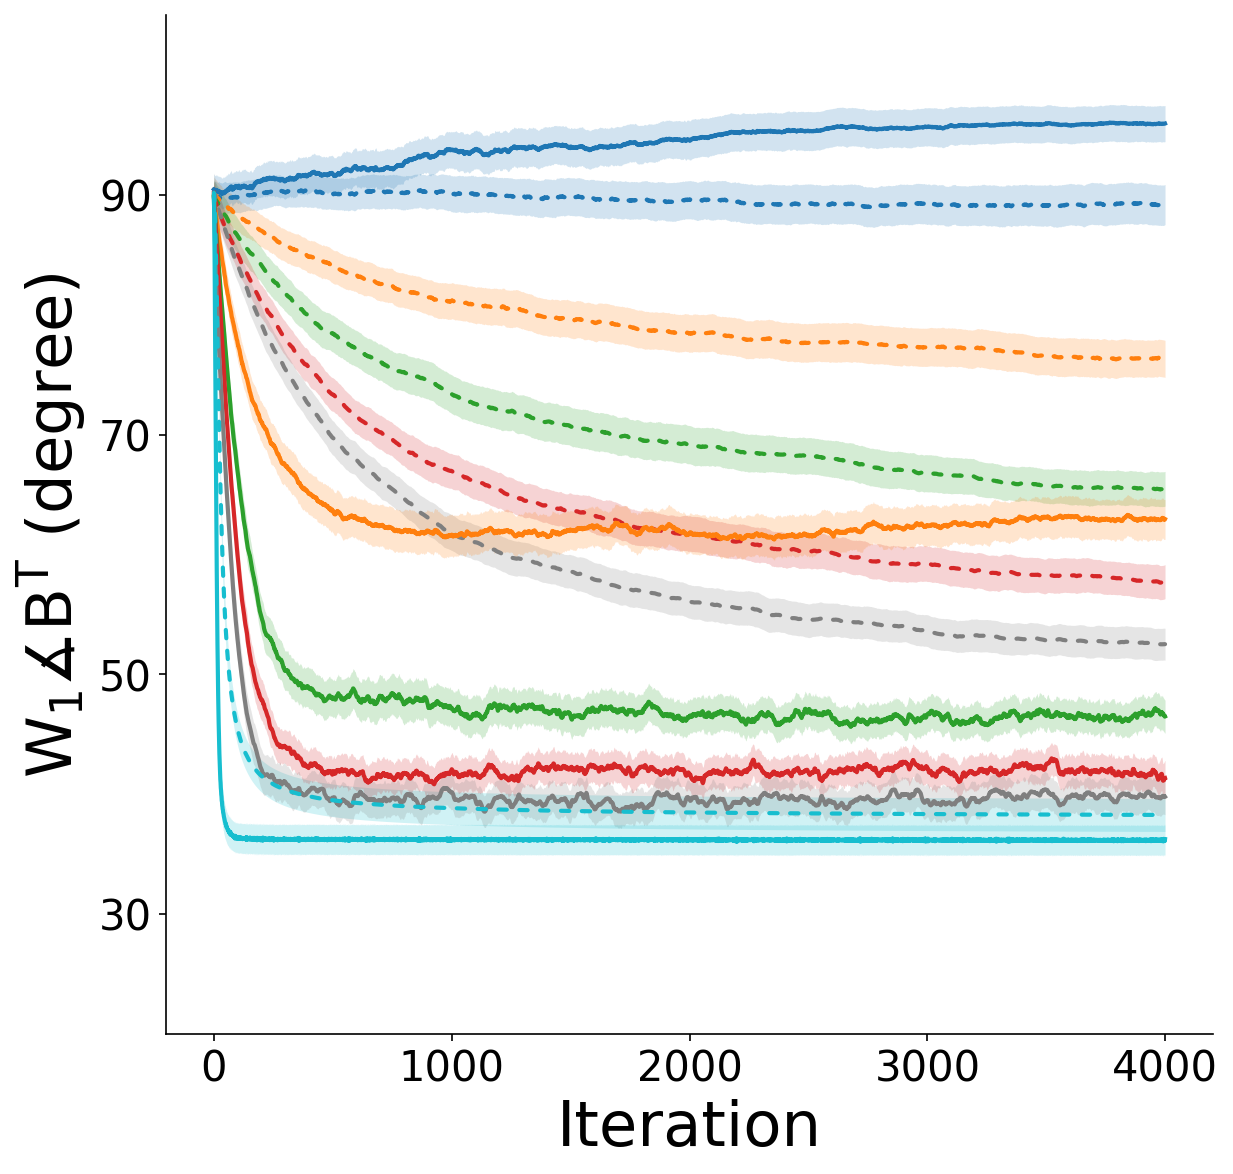

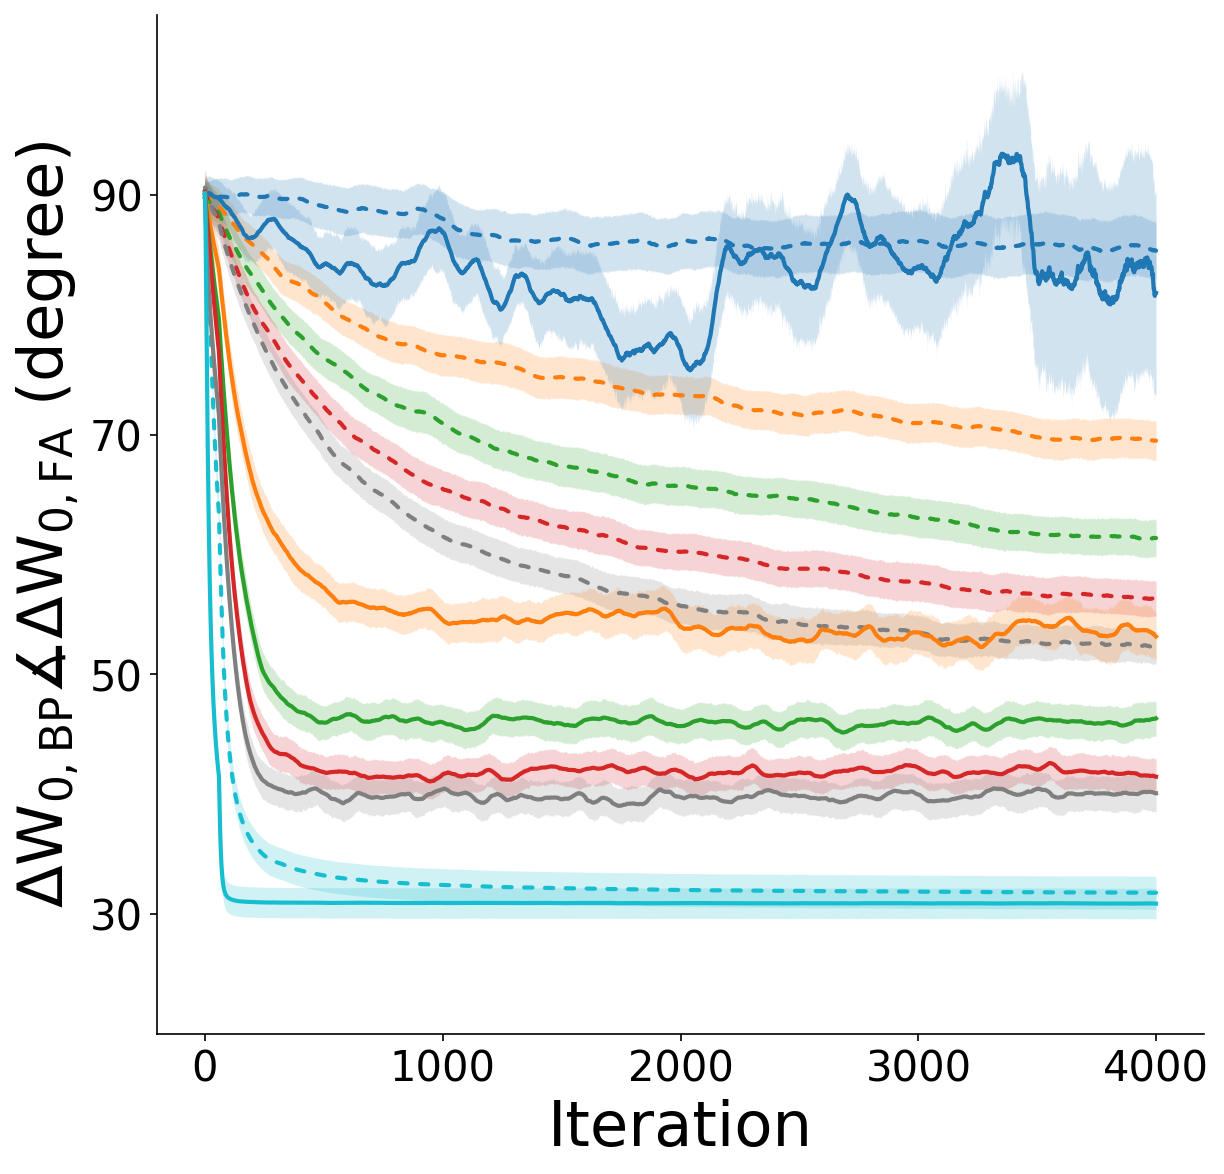

In [ ]:

figsize__ = (9,9) 


linestyle_ = (0,(2,3))
with open(  base_directory_data_str + "No_Normalization_angle_W_B_data.txt"  , "rb") as fp:   #Pickling
  angle_W1_B_list_beta_list1 = pickle.load(fp)


with open( base_directory_data_str + "No_Normalization_angle_dw_bp_fa_data.txt"  , "rb") as fp:   #Pickling
  angle_dw0_bp_dw0_fa_list_beta_list1 = pickle.load(fp)



with open( base_directory_data_str + "Weight_Normalization_angle_W_B.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_list_beta_list = pickle.load(fp)


with open(  base_directory_data_str + "Weight_Normalization_angle_dw_bp_fa_data.txt"  , "rb") as fp:   #Pickling
  angle_dw0_bp_dw0_fa_list_beta_list = pickle.load(fp)


Repetition = len(angle_W1_B_list_beta_list1)//6
N_epoch = len(angle_W1_B_list_beta_list1[0])

plt.figure(num = None, figsize= figsize__ , dpi=150, facecolor='w', edgecolor='k')

j = 0
for i in range(len(angle_W1_B_list_beta_list1)):
  if i%Repetition == 0 :
    j=j+1
    x = torch.tensor(angle_W1_B_list_beta_list1[i:i+Repetition])
    x_mean = x.mean(dim=0) 
    

    if (j-1 == 5):
      plt.plot( x_mean  , linestyle = linestyle_  , dash_capstyle='round'  , color = my_cycle[j-1], linewidth=2 , zorder = 10 )   
    else:
      plt.plot( x_mean  , linestyle = linestyle_  , dash_capstyle='round'  , color = my_cycle[j-1], linewidth=2 )   

    x_sem = x.std(dim=0)/ np.sqrt(Repetition)
    plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)



Repetition = len(angle_W1_B_list_beta_list)//6
N_epoch = len(angle_W1_B_list_beta_list[0])

j = 0
for i in range(len(angle_W1_B_list_beta_list)):
  if i%Repetition == 0 :
    j=j+1
    x = torch.tensor(angle_W1_B_list_beta_list[i:i+Repetition])
    x_mean = x.mean(dim=0) 
    
    if (j-1 == 5):
      plt.plot( x_mean  , '-'  , color = my_cycle[j-1]  , linewidth=2  , zorder = 10 )      
    else:
      plt.plot( x_mean  , '-'  , color = my_cycle[j-1]  , linewidth=2   )    

    x_sem = x.std(dim=0)/np.sqrt(Repetition)
    plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)


# plt.plot( angle_dW1_B_list  , '-' , label = "angle_dW1_B_list"  ) 
plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$W_1 \measuredangle B^T \ (degree)$", fontsize= plt_fontsize_label_)

# if embed_legend != False : 

#   leg = plt.legend( loc  = 'lower right' , fontsize = plt_fontsize_legend_   )
#   for line in leg.get_lines():
#       line.set_linewidth(3.0)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(20,105)
plt.yticks([30,50,70,90])
plt.savefig( base_directory_figure_str + 'beta_change_angle_W_B.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show( )





plt.figure(num = None, figsize= figsize__ , dpi=150, facecolor='w', edgecolor='k')


Repetition = len(angle_dw0_bp_dw0_fa_list_beta_list1)//6
N_epoch = len(angle_dw0_bp_dw0_fa_list_beta_list1[0])

j = 0
for i in range(len(angle_dw0_bp_dw0_fa_list_beta_list1)):
  if i%Repetition == 0 :
    j=j+1
    x = torch.tensor(angle_dw0_bp_dw0_fa_list_beta_list1[i:i+Repetition])


    x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

    x_mean = x.mean(dim=0) 
    filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
    plt.plot( filtered_mean  , linestyle = linestyle_  , dash_capstyle='round'  , color = my_cycle[j-1]  , linewidth=2   )   
    x_sem = x.std(dim=0)/np.sqrt(Repetition)
    plt.fill_between( range(N_epoch)  , filtered_mean-x_sem , filtered_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0 )

Repetition = len(angle_dw0_bp_dw0_fa_list_beta_list)//6
N_epoch = len(angle_dw0_bp_dw0_fa_list_beta_list[0])

j = 0
for i in range(len(angle_dw0_bp_dw0_fa_list_beta_list)):
  if i%Repetition == 0 :
    j=j+1
    x = torch.tensor(angle_dw0_bp_dw0_fa_list_beta_list[i:i+Repetition])
    



    x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

    
    x_mean = x.mean(dim=0) 
    filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
    if(j==1): 
      for iii in range(filtered_mean.shape[0]):
        filtered_mean[iii] = filtered_mean[iii]  - iii*0.003

    plt.plot( filtered_mean  , '-' , color = my_cycle[j-1] , linewidth=2 )   
    x_sem = x.std(dim=0) / np.sqrt(Repetition)
    if (j-1 == 5):
      plt.fill_between( range(N_epoch)  , filtered_mean-x_sem , filtered_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0 )

    else:
      plt.fill_between( range(N_epoch)  , filtered_mean-x_sem , filtered_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0 )




plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$\Delta W_{0,BP} \measuredangle \Delta W_{0,FA} \ (degree)$", fontsize= plt_fontsize_label_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(20,105)
plt.yticks([30,50,70,90])
plt.savefig( base_directory_figure_str + 'beta_change_angle_dw_bp_fa.jpg' , dpi=300  , bbox_inches='tight' ) 
plt.show( )


##############################################















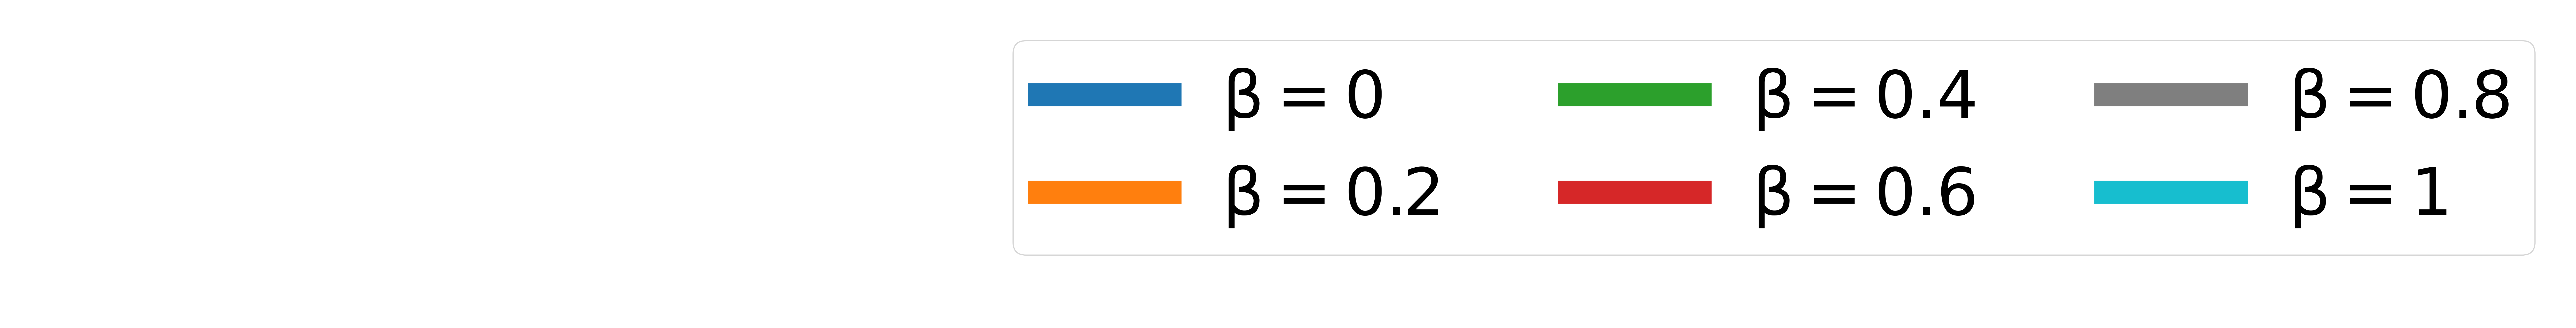

In [ ]:


# save legend
embed_legend = False
figsize__ = ( 6.75 , 9 )





plt.figure(num = None, figsize=(40,5) , dpi=300, facecolor='w', edgecolor='k')

beta_list = [0 , 0.2  , 0.4 , 0.6 , 0.8 , 1]
j = 0
for i in range(len(beta_list)):
    j=j+1

    plt.plot( [0]  , '-' , label = r"$\beta=$" + str(beta_list[j-1]) , color = my_cycle[j-1]  , linewidth=2   )   



leg =  plt.legend(  fontsize = plt_fontsize_legend_ +30  , markerscale=6 ,ncol=3 )

for line in leg.get_lines():
    line.set_linewidth(20)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.axis('off')


def export_legend(legend, filename  , expand=[-40,-40,40,40]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename= base_directory_figure_str + 'legend_beta_change.jpg' )



plt.show()









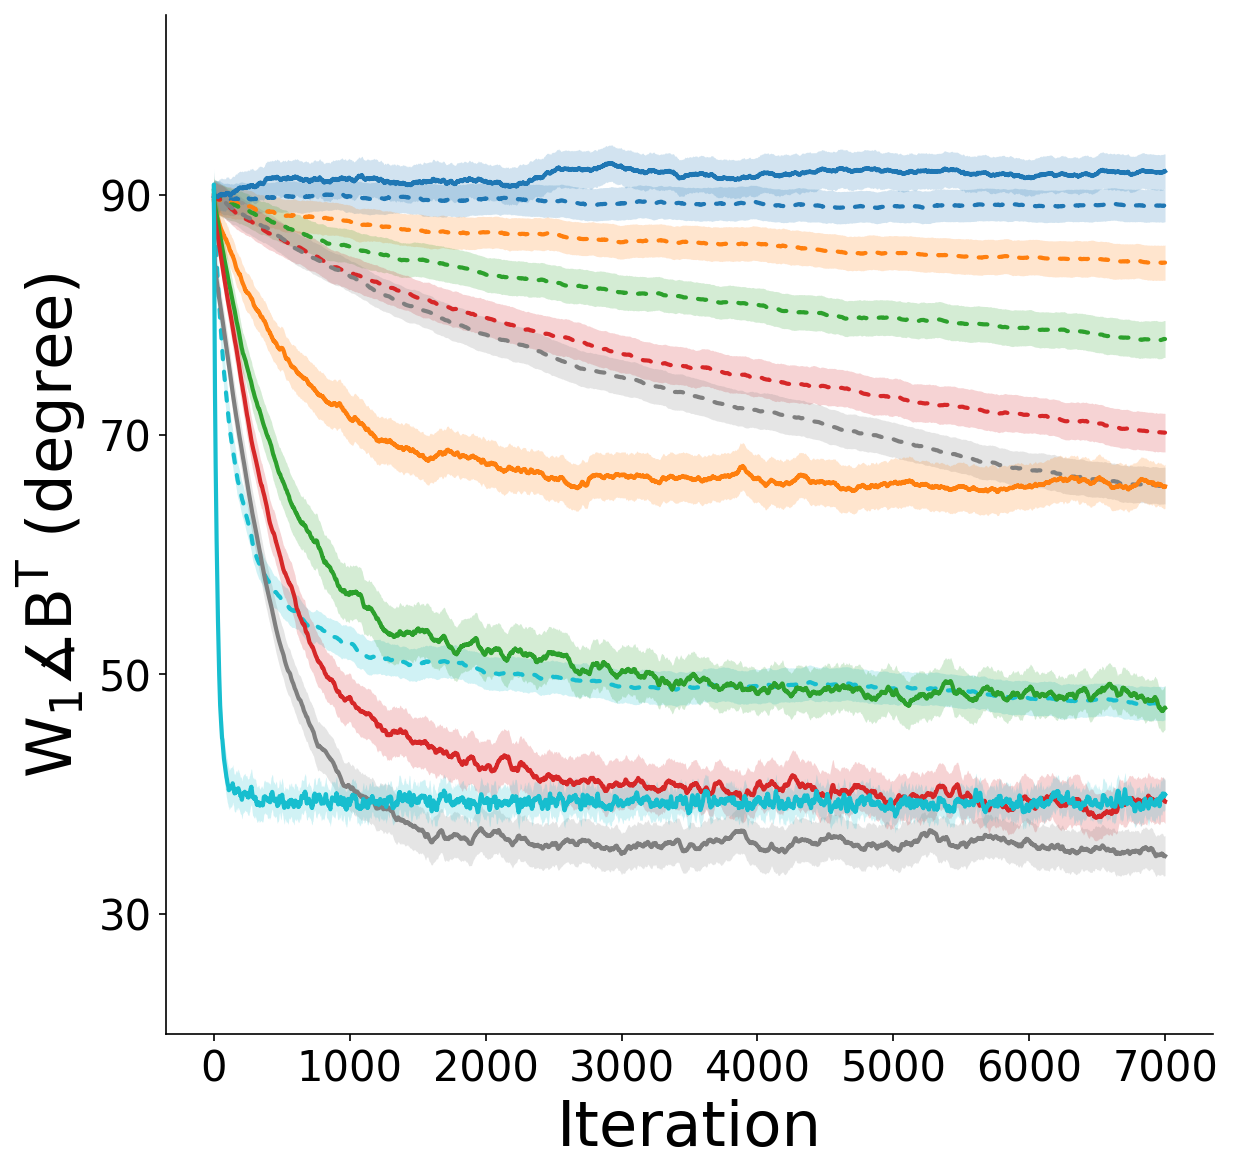

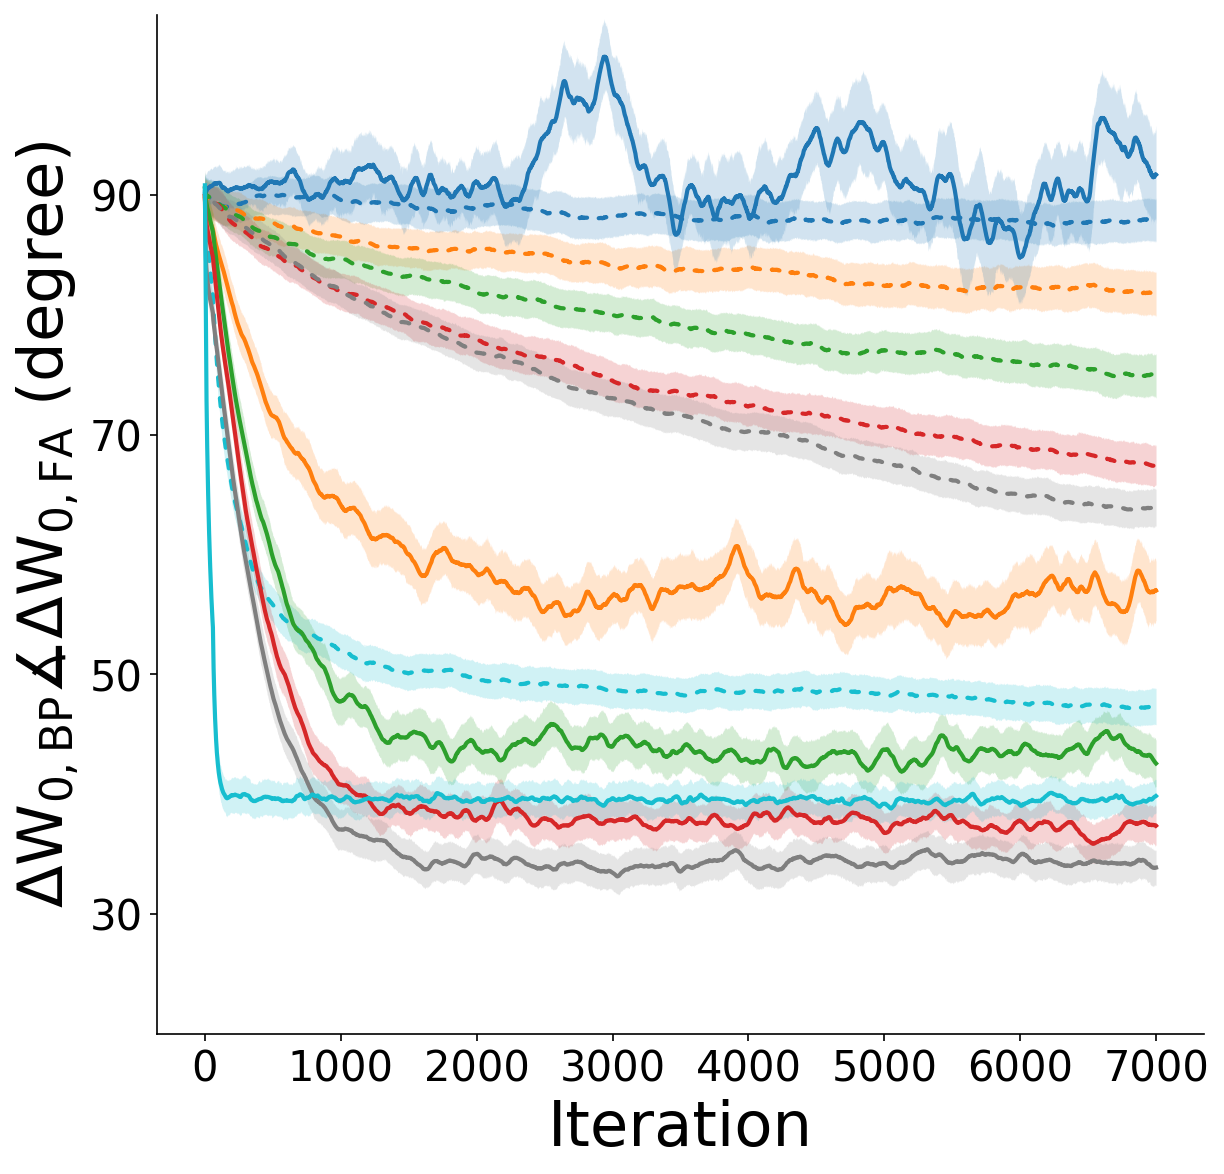

In [ ]:

linestyle_ = (0,(2,3))





with open( base_directory_data_str + "No_Normalization_angle_W_B_betaX.txt" , "rb") as fp:   #Pickling
  angle_W1_B_list_beta_list1 = pickle.load(fp)


with open(  base_directory_data_str + "No_Normalization_angle_dw_bp_fa_data_betaX.txt"    , "rb") as fp:   #Pickling
  angle_dw0_bp_dw0_fa_list_beta_list1 = pickle.load(fp)







with open( base_directory_data_str + "Weight_Normalization_angle_W_B_betaX.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_list_beta_list = pickle.load(fp)


with open( base_directory_data_str + "Weight_Normalization_angle_dw_bp_fa_data_betaX.txt"  , "rb") as fp:   #Pickling
  angle_dw0_bp_dw0_fa_list_beta_list = pickle.load(fp)


figsize__ =(9,9) 

Repetition = 30



plt.figure(num = None, figsize= figsize__ , dpi=150, facecolor='w', edgecolor='k')




Repetition = len(angle_W1_B_list_beta_list1)//6
N_epoch = len(angle_W1_B_list_beta_list1[0])

j = 0
for i in range(len(angle_W1_B_list_beta_list1)):
  if i%Repetition == 0 :
    j=j+1
    x = torch.tensor(angle_W1_B_list_beta_list1[i:i+Repetition])
    x_mean = x.mean(dim=0) 
    plt.plot( x_mean  , linestyle = linestyle_  , dash_capstyle='round' , color = my_cycle[j-1], linewidth=2 )   
    x_sem = x.std(dim=0)/ np.sqrt(Repetition)
    plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)



Repetition = len(angle_W1_B_list_beta_list)//6
N_epoch = len(angle_W1_B_list_beta_list[0])

j = 0
for i in range(len(angle_W1_B_list_beta_list)):
  if i%Repetition == 0 :
    j=j+1
    x = torch.tensor(angle_W1_B_list_beta_list[i:i+Repetition])
    x_mean = x.mean(dim=0) 
    plt.plot( x_mean  , '-' , color = my_cycle[j-1]  , linewidth=2   )   
    x_sem = x.std(dim=0)/np.sqrt(Repetition)
    plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0)



plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$W_1 \measuredangle B^T \ (degree)$", fontsize= plt_fontsize_label_)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(20,105)
plt.yticks([30,50,70,90])
plt.savefig(base_directory_figure_str + 'betaX_change_angle_B_W.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show( )





plt.figure(num = None, figsize= figsize__ , dpi=150, facecolor='w', edgecolor='k')

Repetition = len(angle_dw0_bp_dw0_fa_list_beta_list1)//6
N_epoch = len(angle_dw0_bp_dw0_fa_list_beta_list1[0])

j = 0
for i in range(len(angle_dw0_bp_dw0_fa_list_beta_list1)):
  if i%Repetition == 0 :
    j=j+1
    x = torch.tensor(angle_dw0_bp_dw0_fa_list_beta_list1[i:i+Repetition])


    x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

 
    x_mean = x.mean(dim=0) 
    filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
    plt.plot( filtered_mean  , linestyle = linestyle_  , dash_capstyle='round' , color = my_cycle[j-1]  , linewidth=2   )   
    x_sem = x.std(dim=0)/np.sqrt(Repetition)
    plt.fill_between( range(N_epoch)  , filtered_mean-x_sem , filtered_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0 )

Repetition = len(angle_dw0_bp_dw0_fa_list_beta_list)//6
N_epoch = len(angle_dw0_bp_dw0_fa_list_beta_list[0])

j = 0
for i in range(len(angle_dw0_bp_dw0_fa_list_beta_list)):
  if i%Repetition == 0 :
    j=j+1
    x = torch.tensor(angle_dw0_bp_dw0_fa_list_beta_list[i:i+Repetition])
    



    x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]
    

    x_mean = x.mean(dim=0) 
    filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)


    plt.plot( filtered_mean  , '-'  , color = my_cycle[j-1] , linewidth=2 )   
    x_sem = x.std(dim=0) / np.sqrt(Repetition)
    plt.fill_between( range(N_epoch)  , filtered_mean-x_sem , filtered_mean+x_sem  , color = my_cycle2[j-1] , alpha=0.2 , linewidth=0 )



plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$\Delta W_{0,BP} \measuredangle \Delta W_{0,FA} \ (degree)$", fontsize= plt_fontsize_label_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(20,105)
plt.yticks([30,50,70,90])
plt.savefig( base_directory_figure_str + 'betaX_change_angle_dW_bp_fa.jpg' , dpi=300 , bbox_inches='tight' )



plt.show( )


##############################################















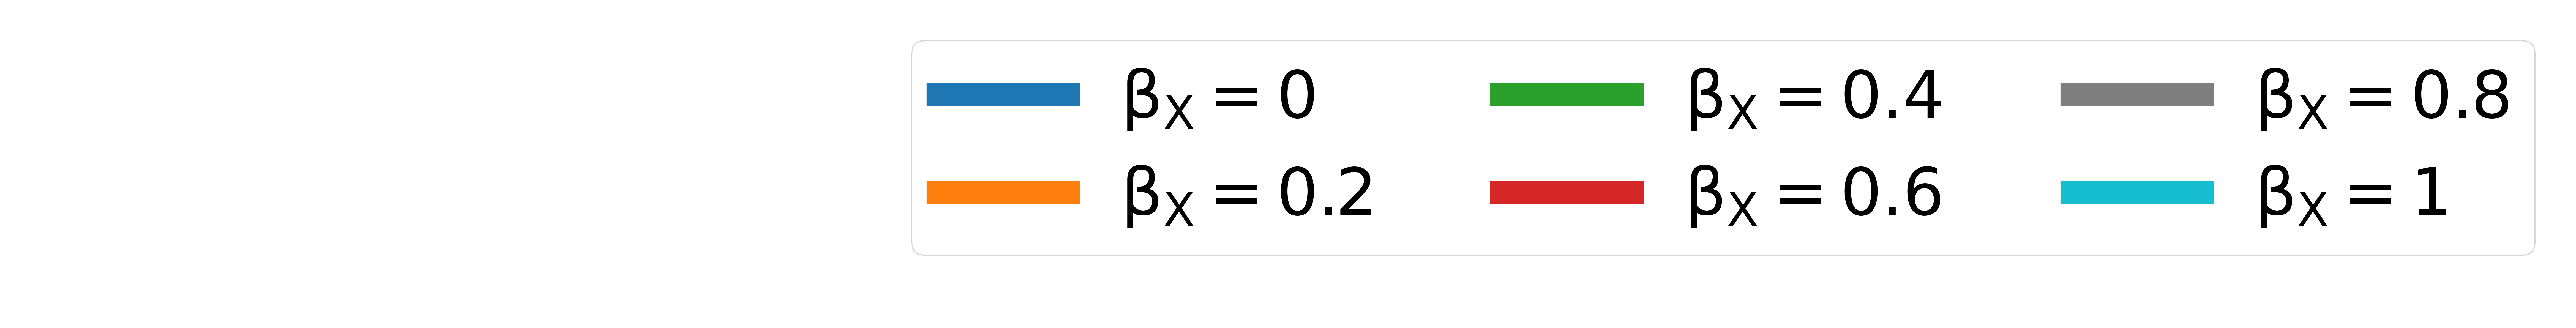

In [ ]:


plt.figure(num = None, figsize=(40,5) , dpi=300, facecolor='w', edgecolor='k')

beta_list = [0 , 0.2  , 0.4 , 0.6 , 0.8 , 1]
j = 0
for i in range(len(beta_list)):
    j=j+1

    plt.plot( [0]  , '-' , label = r"$\beta_X=$" + str(beta_list[j-1]) , color = my_cycle[j-1]  , linewidth=2   )   



leg =  plt.legend(  fontsize = plt_fontsize_legend_ +30  , markerscale=6 ,ncol=3 )

for line in leg.get_lines():
    line.set_linewidth(20)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

# plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# plt.ylim(0,108)
# plt.xlim(-100 ,10000)
# plt.yticks([10,30 ,50 ,70 ,90])

plt.axis('off')


def export_legend(legend, filename  , expand=[-40,-40,40,40]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename= base_directory_figure_str + 'legend_beta_X_change.jpg' )



plt.show()




# Plot autocorrelograms

In [ ]:

def correlogram(signal1 , signal2 , lag_n , lag_p , N_sample = None ):
  if not torch.is_tensor(signal1): raise Exception("signal1 is not tensor")
  if not torch.is_tensor(signal2): raise Exception("signal2 is not tensor")
  if  len(signal2.shape)!=1: raise Exception("len(signal2.shape)!=1")
  if  len(signal1.shape)!=1: raise Exception("len(signal1.shape)!=1")
  if  type (lag_n)!= int: raise Exception("type (lag_n)!= int")
  if  type (lag_p)!= int: raise Exception("type (lag_p)!= int")
  lags = torch.tensor(range(lag_n , lag_p+1))
  correlogram = torch.zeros(len(lags))

  lens1 = len(signal1)
  lens2 = len(signal2)
  if N_sample == None :
    for i in range(len(lags)):
      lag = lags[i]
      if lag >= 0:
        correlogram[i] = torch.mul( signal1[lag  : ] , signal2[0  : lens1-lag ] ).mean()

      if lag < 0:
        lag = - lag
        correlogram[i] = torch.mul( signal2[lag  : ] , signal1[0  : lens2-lag ] ).mean()

  else :
    for i in range(len(lags)):
      lag = lags[i]
      if lag >= 0:
        correlogram[i] = torch.mul( signal1[lag  : lag+N_sample ] , signal2[0  : N_sample ] ).mean()

      if lag < 0:
        lag = - lag
        correlogram[i] = torch.mul( signal2[lag  : lag+N_sample ] , signal1[0  : N_sample ] ).mean()


  return lags , correlogram


from_lagn = -8
to_lagp = 8

beta_list = [0 , 0.2  , 0.4 , 0.6 , 0.8 , 1]

signal_betas = []
N_iterations = 80000
for beta in beta_list:
  e = torch.randn([1])*0
  if (beta==1):
    e=torch.tensor([0.7])
  signal = []
  signal.append(e)
  for i in range(N_iterations):
    if (beta!=1):
      e = e*beta +  torch.randn([1])*(1-beta)
    signal.append(e.item())
  signal_betas.append(signal)


correlation_betas = []
for i in range(len(beta_list)):
  signal = torch.tensor(signal_betas[i]) 
  lags , correlogram_out  =  correlogram(  signal   ,  signal ,from_lagn, to_lagp , 5000 )
  correlation_betas.append( correlogram_out  )




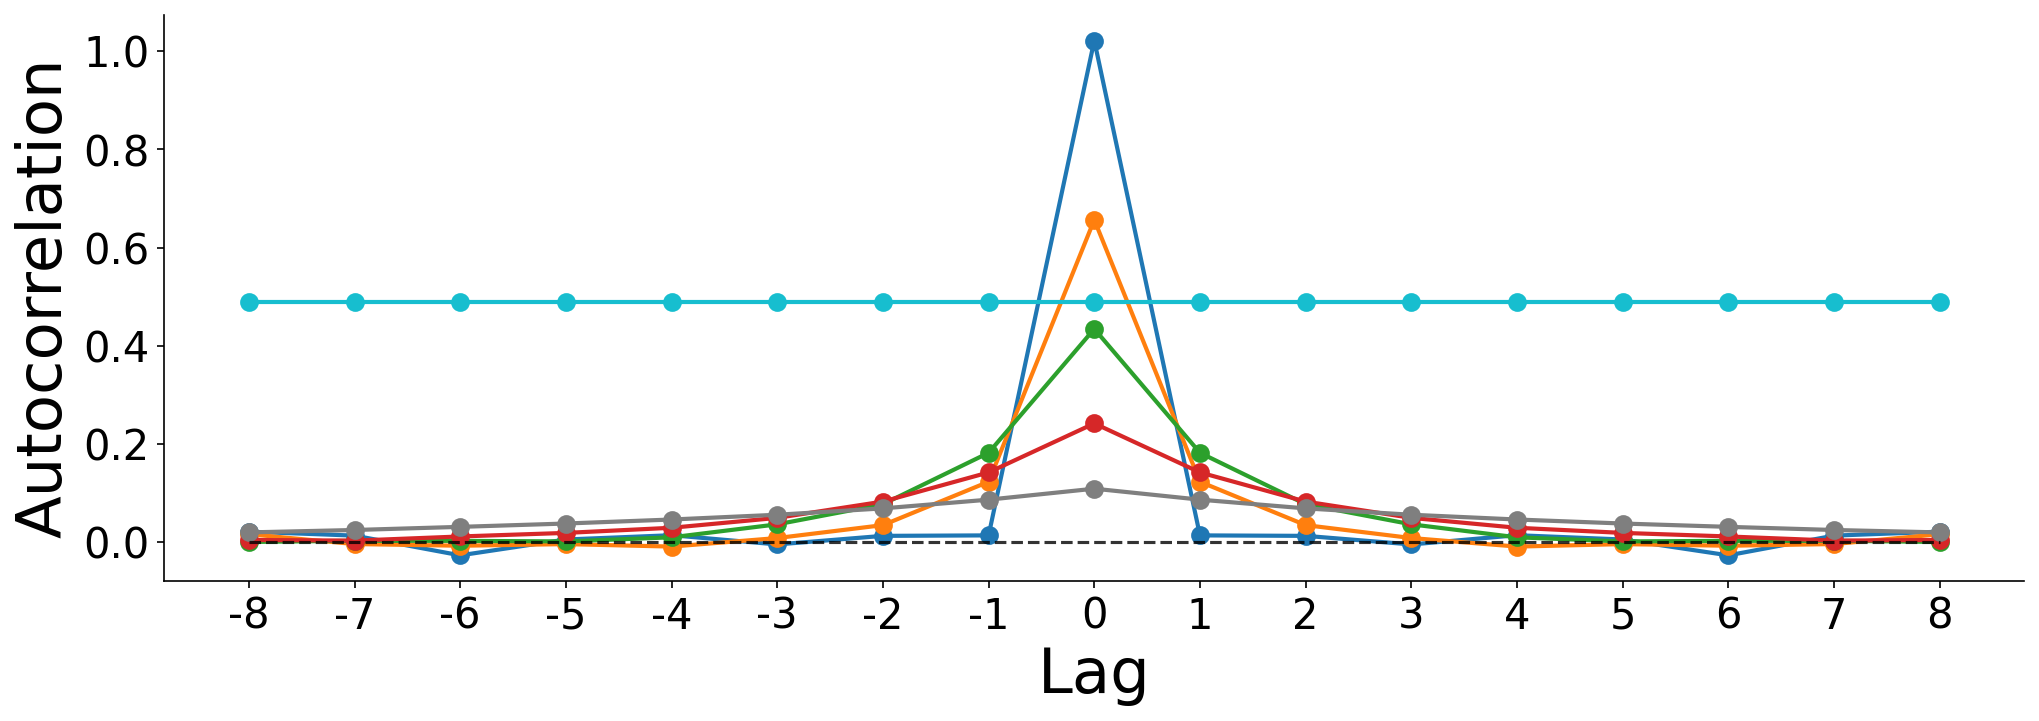

In [ ]:

plt.figure(num = None, figsize=(16,5), dpi=150, facecolor='w', edgecolor='k')

j = 0
for i in range(len(beta_list)):

    plt.plot(lags,  correlation_betas[i]  , '-' , label = r"$\beta=$" + str( beta_list[i] ) , color = my_cycle[i] , linewidth=2 , marker = 'o' , markersize=8 )   

plt.hlines(y=0 , xmin=from_lagn , xmax=to_lagp , linestyles='--'  , alpha = 0.8 , color='k' ,zorder=100 )


plt.xlabel("Lag", fontsize= plt_fontsize_label_)
plt.ylabel(r"Autocorrelation", fontsize= plt_fontsize_label_)



ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

step = 1
x_ticks_l = np.arange( from_lagn ,  to_lagp+1 , 1 )
label_x_ticks = []
xticks = np.arange( from_lagn , to_lagp + 1 ,step)
for i in range(len(xticks)):
  label_x_ticks.append(str(xticks[i]))
  for j in range(step-1):
    if (len(label_x_ticks)< len(x_ticks_l)):
      label_x_ticks.append('')

plt.xticks( x_ticks_l  , label_x_ticks  )
plt.savefig(base_directory_figure_str + 'auto_correlation_function.jpg' , dpi=300 , bbox_inches='tight'   ) 
plt.show( )
